#Lesson 119: PCA - Dimensionality Reduction

---

### Teacher-Student Activities

In the subsequent lessons, we will learn one of the important application of Principal Component Analysis  i.e. **Dimensionality Reduction**. To recall, the **dimensions** refer to the number of features associated with a dataset.

A dataset can be viewed as high dimensional under the following conditions:

1. When the number of features is significantly larger than training instances.

2. When the dataset consists of hundreds or even tens of thousands of features.

These kinds of datasets are fairly common in healthcare, environmental, financial, or digital marketing fields.

For these problem statements, the primary objective of Data Scientists/Machine Learning engineers also includes scientific reduction of these features to implement ML algorithms faster without loosing accuracy.

In this lesson, we will explore a dataset in the environmental domain to understand the concept of dimensionality reduction. First, let us look at the problem statement.

---

####Problem Statement

You are given with a dataset consisting of forest cover type for $7$ types of trees that predominantly grow in the particular geographic area. The data is acquired for $4$ wilderness areas located in the Roosevelt National Forest of northern Colorado, United States. (**wilderness** refers to natural environments on earth that has minimum/negligible human interference.

You need to build a classifier model to predict the forest cover type based on geographical features.

**Understanding the Dataset:**

The dataset has $2160$ observations for each of the following $7$ forest cover types (trees). Click the tree name link to know more about the respective tree.

**`Target Label`**: `Cover_Type` (integers `1` to `7`) - Forest Cover Type (Tree Type) designation:

<center>

`1` - [Spruce/Fir tree](https://en.wikipedia.org/wiki/Spruce)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/f696de10-0a55-4ef0-ae8e-25586e9339f4.jpg width='300'>

Image by: By The original uploader was MPF at English Wikipedia. - Transferred from en.wikipedia to Commons., CC BY-SA 3.0, https://commons.wikimedia.org/w/index.php?curid=2440504

<br>

`2` - [Lodgepole Pine tree](https://en.wikipedia.org/wiki/Pinus_contorta)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/b5243445-5da6-4712-b312-5ee663e51eaa.jpeg width='300'>

Image by: By stereogab - Western Pines, CC BY-SA 2.0, https://commons.wikimedia.org/w/index.php?curid=11341935

<br>

`3` - [Ponderosa Pine tree](https://en.wikipedia.org/wiki/Pinus_ponderosa)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/856d8d81-c01d-4e3c-8045-6ab88f94b9e8.jpeg width='300'>

Image by: By Jason Sturner - Custer State Park, Pahá Sápa (Black Hills), South Dakota, CC BY 2.0, https://commons.wikimedia.org/w/index.php?curid=10487324

<br>

`4` - [Cottonwood/Willow tree](https://en.wikipedia.org/wiki/Willow)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/c3d28806-dedc-4858-b87e-532184115fa6.jpeg width='300'>

Image by: Sb2s3 - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=44184869

<br>

`5` - [Aspen tree](https://en.wikipedia.org/wiki/Aspen)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/4390f2a8-93a7-4b83-8f4a-266ecf0e7d54.jpg width='300'>

Image by: By Doug Dolde at English Wikipedia - Contax 645, 120mm, Leaf Aptus 75S, Public Domain, https://commons.wikimedia.org/w/index.php?curid=21714613

<br>

`6` - [Douglas-fir tree](https://en.wikipedia.org/wiki/Douglas_fir)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/a4d89f9c-77a7-43c5-a492-0253d64f23e5.jpg width='300'>

Image by: By Dave Powell, USDA Forest Service - This image is Image Number 1210046 at Forestry Images, a source for forest health, natural resources and silviculture images operated by The Bugwood Network at the University of Georgia and the USDA Forest Service., CC BY 3.0 US, https://commons.wikimedia.org/w/index.php?curid=5311562

<br>

`7` - [Krummholz tree](https://en.wikipedia.org/wiki/Krummholz)

<img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/8827ad95-d0e0-480a-be1a-68f6febb8d27.jpeg width='300'>

Image by: John Spooner - flickr.com, CC BY 2.0, https://commons.wikimedia.org/w/index.php?curid=5007578
</center>

The dataset has **54 features** which can broadly be divided into two categories:
1. `Geographical fields` (14 features): These features are based on location and other geographical parameters of the patch.

2. `Soil type` (40 features): These features consists of details on the type of soil found in the patch.

**Geographical Fields:**

1. `Elevation` - Elevation in meters.

2. `Aspect` - Aspect in degrees azimuth*.

3. `Slope` - Slope in degrees.

4. `Horizontal_Distance_To_Hydrology` - Horizontal distance to nearest source  of surface water.

5. `Vertical_Distance_To_Hydrology` - Vertical distance to nearest source of surface water.

6. `Horizontal_Distance_To_Roadways` - Horizontal distance to nearest roadway.

7. `Horizontal_Distance_To_Fire_Points` - Horizontal distance to nearest wildfire ignition points.

8. `Hillshade_9am` (0 to 255 index) - Hillshade index at 9am, summer solstice*.

9. `Hillshade_Noon` (0 to 255 index) - Hillshade index at noon, summer solstice.

10. `Hillshade_3pm` (0 to 255 index) - Hillshade index at 3pm, summer solstice

- `Wilderness_Area` (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation where the study has been carried. The wilderness areas are:

  ```
11 - Rawah Wilderness Area
12 - Neota Wilderness Area
13 - Comanche Peak Wilderness Area
14 - Cache la Poudre Wilderness Area
  ```

**Soil Type fields:**

`Soil_Type`: These fields indicate the type of soil found in the respective study area
It consists of 40 binary columns where, 0 = absence or 1 = presence of the respective soil type. . Various **soil types** are:

  ```
1 Cathedral family - Rock outcrop complex, extremely stony.
2 Vanet - Ratake families complex, very stony.
3 Haploborolis - Rock outcrop complex, rubbly.
4 Ratake family - Rock outcrop complex, rubbly.
5 Vanet family - Rock outcrop complex, rubbly.
6 Vanet - Wetmore families - Rock outcrop complex, stony.
7 Gothic family.
8 Supervisor - Limber families complex.
9 Troutville family, very stony.
10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
11 Bullwark - Catamount families - Rock land complex, rubbly.
12 Legault family - Rock land complex, stony.
13 Catamount family - Rock land - Bullwark family complex, rubbly.
14 Pachic Argiborolis - Aquolis complex.
15 unspecified in the USFS Soil and ELU Survey.
16 Cryaquolis - Cryoborolis complex.
17 Gateview family - Cryaquolis complex.
18 Rogert family, very stony.
19 Typic Cryaquolis - Borohemists complex.
20 Typic Cryaquepts - Typic Cryaquolls complex.
21 Typic Cryaquolls - Leighcan family, till substratum complex.
22 Leighcan family, till substratum, extremely bouldery.
23 Leighcan family, till substratum - Typic Cryaquolls complex.
24 Leighcan family, extremely stony.
25 Leighcan family, warm, extremely stony.
26 Granile - Catamount families complex, very stony.
27 Leighcan family, warm - Rock outcrop complex, extremely stony.
28 Leighcan family - Rock outcrop complex, extremely stony.
29 Como - Legault families complex, extremely stony.
30 Como family - Rock land - Legault family complex, extremely stony.
31 Leighcan - Catamount families complex, extremely stony.
32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34 Cryorthents - Rock land complex, extremely stony.
35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
40 Moran family - Cryorthents - Rock land complex, extremely stony.
  ```

[*azimuth](https://en.wikipedia.org/wiki/Azimuth): Azimuth angle gives the compass angle/direction with respect to North which is considered as $0^o$.

[*summer solstice](https://en.wikipedia.org/wiki/Summer_solstice): The longest day of summer (June $21^{st}$) when the Earth poles have maximum tilt towards the Sun.

<br>

**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/covertype

Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.

**Donors of database:**

1. Jock A. Blackard (jblackard '@' fs.fed.us)
GIS Coordinator
USFS - Forest Inventory & Analysis
Rocky Mountain Research Station
507 25th Street
Ogden, UT 84401

2. Dr. Denis J. Dean (denis.dean '@' utdallas.edu)
Professor
Program in Geography and Geospatial Sciences
School of Economic, Political and Policy Sciences
800 West Campbell Rd
Richardson, TX 75080-3021

3. Dr. Charles W. Anderson (anderson '@' cs.colostate.edu)
Associate Professor
Department of Computer Science
Colorado State University
Fort Collins, CO 80523 USA

---

#### Activity 1: Importing Modules and Reading Data

Let's import the necessary Python modules.

Also, read the data from a csv file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).

**Dataset Link:**
https://s3-whjr-curriculum-uploads.whjr.online/ccf634ae-55a4-4b49-9ef4-9a137c5c07fe.csv

In [ ]:
# S1.1: Import the required modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the dataset and print first five records.
df = pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/ccf634ae-55a4-4b49-9ef4-9a137c5c07fe.csv')
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


Now, let's find out the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.

In [ ]:
# S1.2: Get the total number of rows and columns, data types of columns and missing values (if exist) in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

There are 15,120 rows and 56 columns and 0 missing (or null) values in the dataset. Also, all the columns have integer values.

The `Id` column does not contribute any information. Let's drop the `Id` column from the DataFrame.

In [ ]:
# S1.3: Let's drop the Id column
df.drop(columns = 'Id',inplace = True)

The `Id` column has been removed and there are no unwanted spaces/characters in the column names.

As per dataset description, the dataset consists of 2160 observations for each of the tree type and each type is represented by an integer. Let's get the counts for the target label: tree type from `Cover_Type` column:

In [ ]:
# S1.4: Get the counts of tree types to verify the counts given in the dataset
df['Cover_Type'].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

The dataset consists of $2160 \times 7 = 15120$ data points which mean the dataset description is correct. Let's proceed with the exploratory data analysis.

---

#### Activity 2: Exploratory Data Analysis

Now, let's analyse the data to find out any kind of pattern in the dataset. Before we proceed further, first we create separate DataFrames for features and the target column.

1. Create a `features_df` DataFrame by dropping the `Cover_Type` column from the original DataFrame.   For making a copy of the DataFrame use `DataFrame.copy(deep = True)` function.
  - This function makes a copy of the source DataFrame along with indices and data.
  - When `deep = True`, modifications to the data or indices of the copy will not be reflected in the original object, hence the source dataset will remain unaffected by further data processing steps.

  While making the copy we can use the `drop()` function to drop the target label. Therefore the code will be:

  `features_df = df.copy(deep = True).drop(['Cover_Type'], axis = 1)`

2. Create a `covertype_df` DataFrame consisting of target values from the original DataFrame.

For more information use `help(df.copy)` function.


Next, split the DataFrame into features and target.

In [ ]:
# S2.1: Split the features and target into separate DataFrames
features_df = df.copy(deep = True).drop(['Cover_Type'],axis = 1)
target_df = df['Cover_Type']


The dataset consists of binary features and continuous features. Let's create a list of features having more than 2 unique values using the steps given below:

1. Create an empty list `continuous_features`.

2. Initiate a `for` loop that iterates through all the columns of `features_df` DataFrame . Inside this `for` loop, check:

  - If the respective column in `features_df` consists of more than 2 unique values.

  - If yes, then append that column to the `continuous_features` list.

3. Print `continuous_features` list along with its length.

In [ ]:
# S2.2: Obtain a list of continuous features


continuous_features = []

for feature in features_df.columns:       # Initiate a for loop to iterate through all the features
  if features_df[feature].nunique() > 2:  # Get the count of unique values in the corresponding feature
    continuous_features.append(feature)   # If count of unique values is greater than 2 append the feature name to continuous_features list

print("Continuous Features:\n", continuous_features)
print('Count of continuous features:', len(continuous_features))

Continuous Features:
 ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
Count of continuous features: 10


The list `continuous_features` now consists of all the non-binary features from the dataset. This also confirms that none of the binary columns has more than two unique values.


Next,

1. Analyse the distribution of these `continuous_features` with respect to forest `Cover_Type`.

2. Create a pivot table for `continuous_features` as values and `Cover_Type` as index to group the values by their mean and observe if there exists a clear pattern to identify the features of high importance.

You can read more about the `pivot_table()` function from:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [ ]:
# S2.3: Display the mean values of the continuous columns with respect to tree type.
pd.pivot_table(df,index = 'Cover_Type',values = df[continuous_features])

,Aspect,Elevation,Hillshade_3pm,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Slope,Vertical_Distance_To_Hydrology
Cover_Type,,,,,,,,,,
1,159.463426,3128.025926,144.065741,211.690278,223.248611,1994.412963,271.507407,2579.715741,13.112963,41.281481
2,151.097222,2922.540278,142.950926,214.044444,225.369907,2155.277315,287.728704,2425.791667,13.423611,47.337963
3,173.672685,2398.423148,141.549537,201.655556,216.561111,916.909722,210.723148,969.595833,20.628704,64.081944
4,138.099537,2223.420370,111.808796,227.968056,216.889815,860.540741,104.537500,915.100463,18.468519,40.143519
5,137.992130,2786.801389,121.392593,223.368981,218.317130,1530.388889,208.873148,1329.318519,16.724537,50.871296
6,180.617130,2423.276852,147.682407,193.562963,209.960648,1057.654167,160.095370,1064.980556,18.986111,44.873611
7,155.794444,3362.769907,136.193981,216.639815,222.412037,2062.847222,346.904630,2713.659722,14.166667,68.945833


From the pivot table, we observe that tree type `7 - Krummholz tree` are generally found at the highest elevation followed by tree type `1 - Spruce/Fir tree` and so on. This means the `Elevation` feature carries significant information about the target label.

Similar kinds of observations can be drawn for other features as well. However, most of the features are distributed without clear distinction among the features within the cover type. This means feature engineering is necessary if we want to reduce the number of features in the dataset.

<br>

Next, let's check the distribution of the continuous variables with respect to `Cover_Type`. Create a boxplot for each feature in `continuous_features` list to understand its distribution with respect to the `Cover_Type` column.


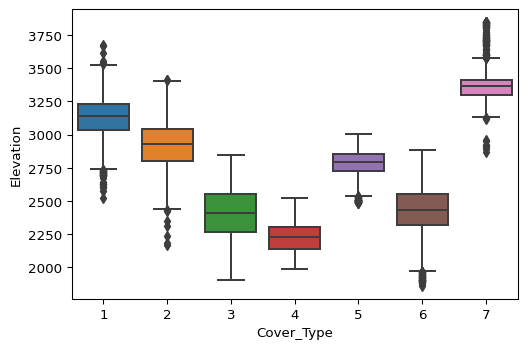

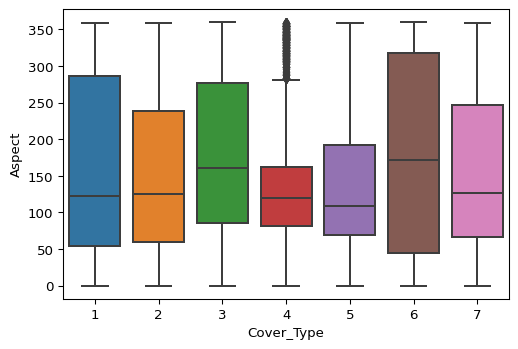

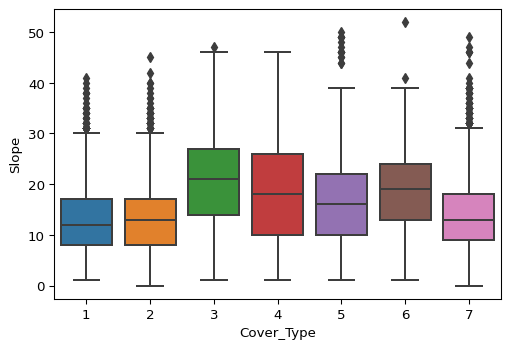

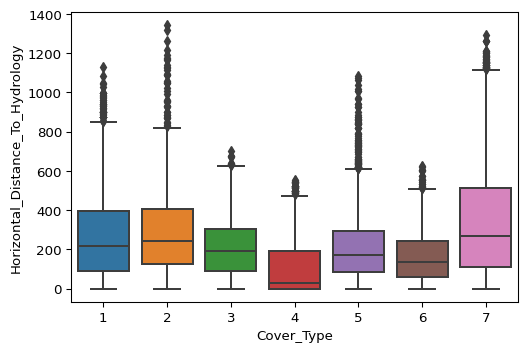

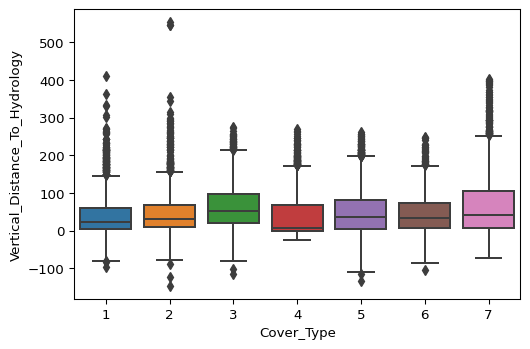

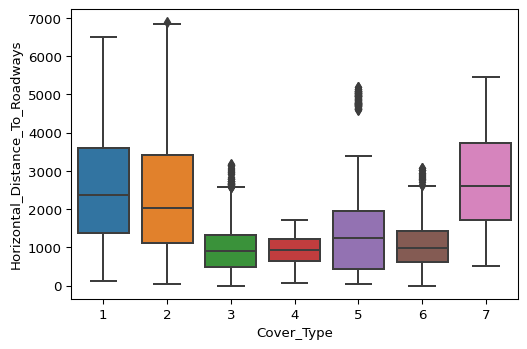

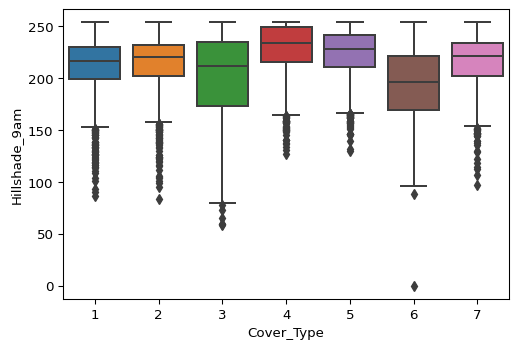

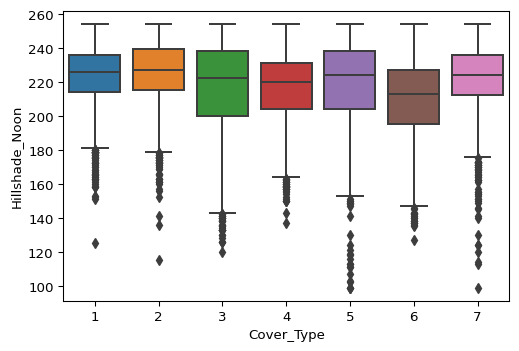

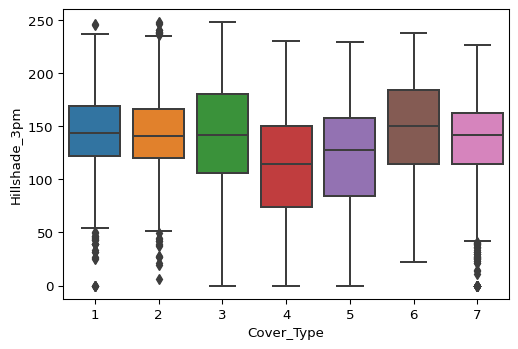

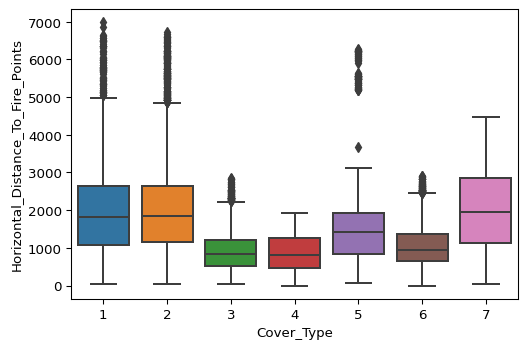

In [ ]:
# S2.4: Obtain boxplot for all continuous features
for i in continuous_features:
    plt.figure(figsize=(6,4),dpi = 96)
    sns.boxplot(x = df['Cover_Type'],y = features_df[i])
    plt.show()

As expected the feature `Elevation` plays a noticeable part in distinguishing the tree cover type. However, there exists a lot of outliers in the dataset. Since the problem statement belongs to environmental domain the outliers are expected and need to be addressed by the ML model. Hence we will not remove the outliers and the classifier model should be able to handle these outliers as well.

Next, obtain the statistical summary of the features in the `continuous_features` list to confirm if there are any anomalies pertaining the range/value of features in the dataset.

In [ ]:
# S2.5: Obtain the statistical description for continuous features in the dataset.
df[continuous_features].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


Here we observe the dataset has all the values of features within the practical range and does not require preprocessing.

**Note:**  The **negative distance** values in the `Vertical_Distance_To_Hydrology` column indicate that the elevation of the particular tree is lower than the elevation of the nearest hydrology station which is a possibility in hilly areas.


<br>


Next, check if there are any redundant features in the dataset. These may be some features which are constant throughout the dataset and hence do not contribute any information to the classifier and can be removed. For this:

1. Create an empty list: `constant_features`.

2. Initiate a `for` loop to iterate through all the features. In this loop:

  1. Check if a particular feature has only 1 unique value using `nunique()` function. If yes, then append that feature to `constant_features` list.

3. Finally print the list of `cnstant_features`.


In [ ]:
# S2.6: Let's check for columns that exhibit constant values throughout the dataset
constant_features = []
for feature in features_df.columns:
    if features_df[feature].nunique() == 1:
        constant_features.append(feature)
print(constant_features)

['Soil_Type7', 'Soil_Type15']


This means the features `'Soil_Type7` and `Soil_Type15` have only 1 value for all the rows of the dataset. Let us find out what is that  value using the `value_counts()` function.

In [ ]:
# S2.7: Get the counts of values for 'Soil_Type7' and 'Soil_Type15' features
features_df.drop(columns = ['Soil_Type7', 'Soil_Type15'],inplace = True)

Both the features exhibit a constant value of `0` which means these soil types were not found anywhere in the study area. Let's remove these features from `features_df` DataFrame. Also, check the count of remaining features in the dataset.

In [ ]:
# S2.8: Drop the redundant features.


Two features have now been eliminated and hence the number of features is now 52.

Next, let us analyse the correlation among the features in the `continuous_features` list and also with the target variable.

---

#### Activity 3: Correlation Analysis and Data Normalisation

Let's create a correlation heatmap for features in the `continuous_features` list to see which features contribute higher towards forest cover type.

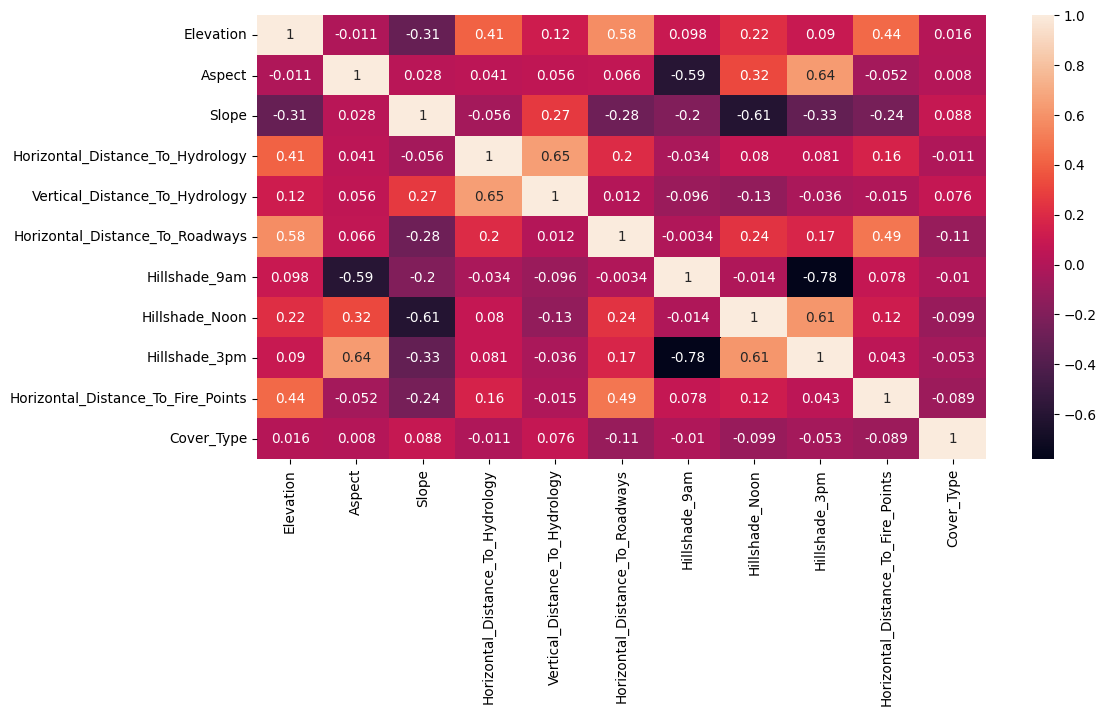

In [ ]:
# S3.1: Create a correlation heatmap
joint_df = features_df[continuous_features].join(target_df).corr()
plt.figure(figsize=(12,6),dpi = 98)
sns.heatmap(joint_df,annot = True)
plt.show()

As opposed to observations from a pivot table, the continuous features does not show a strong correlation with the covertype. This means the forest cover type is dependent on a number of factors. Hence we need some advanced feature engineering techniques to reduce the dataset size.

However, before we proceed for feature engineering we need to normalise the continuous features. For that let's create separate DataFrames for continuous features and  binary features.

In [ ]:
# S3.2: Create separate DataFrames for continuous features and binary features
continuous_features_df = features_df[continuous_features]
binary_features_df = features_df.drop(columns = continuous_features)

This means we have $10$ `continuous_features` and $42$ `binary_features` in the dataset.

Let's normalise the continuous features using `StandardScaler` technique.

In [ ]:
# S3.3: Normalise the continuous features
from sklearn.preprocessing import StandardScaler
     # Define StandardScaler object
     # Apply fit and transform operation using 'fit_transform()'
std = StandardScaler()
trans = std.fit_transform(continuous_features_df)
new_df = pd.DataFrame(trans,columns = continuous_features_df.columns)
# Create a new DataFrame for scaled features
new_df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,-0.367095,-0.959980,-1.597132,0.146639,-0.834074,-0.908681,0.271454,0.571653,0.281259,4.334805
1,-0.381461,-0.914559,-1.715424,-0.072337,-0.932054,-0.999246,0.238732,0.703225,0.346627,4.285710
2,0.130912,-0.160577,-0.887379,0.194243,0.227369,1.106379,0.696843,0.834797,-0.002005,4.191156
3,0.085421,-0.015231,0.177250,0.070474,1.092853,1.038455,0.827731,0.834797,-0.285268,4.272981
4,-0.369489,-1.014485,-1.715424,-0.353198,-0.850404,-0.998491,0.238732,0.659368,0.324838,4.237524
...,...,...,...,...,...,...,...,...,...,...
15115,-0.340758,0.784172,0.768711,0.146639,-0.719765,-0.795476,-1.397379,1.404943,1.719366,-0.208335
15116,-0.350335,-0.324091,0.295543,1.931773,2.350255,-0.827173,1.187676,0.089223,-0.960742,-0.169240
15117,-0.616099,-0.205998,1.005295,0.655997,1.076523,-1.040755,1.220398,0.045366,-1.135058,-0.294706
15118,-0.628070,0.093779,1.360172,-0.043775,0.815245,-1.110942,0.533231,0.790940,-0.350637,-0.526545


Now that we have normalised continuous features, let us `join` the normalised continuous features and binary features to form a scaled features DataFrame.

**Note:** Binary features do not need scaling.

In [ ]:
# S3.4: Join the scaled continuous features and binary features


Here we observe that the continuous features are normalised and binary features remain unchanged. Now we have the dataset ready for feature engineering.

Let's stop here. In the next class, we will continue working on this problem statement and implement two feature reduction algorithms  **RFE** and **PCA** for this dataset. We will also compare the performance of both the algorithms to understand which algorithm will perform better feature reduction for this dataset.

---

### **Project**
You can now attempt the **Applied Tech Project 119 - PCA V - Dimensionality Reduction** on your own.

**Applied Tech Project 119 - PCA V - Dimensionality Reduction**: https://colab.research.google.com/drive/1FynBrc8h6WgeHgXphguCjJLmUfuBYMD6

---